In [1]:
# Step 1: Import libraries
import pandas as pd                # For handling dataset as DataFrame (tabular data)
import numpy as np                 # For numerical operations
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.model_selection import train_test_split # To split dataset into training and testing
from sklearn.preprocessing import LabelEncoder       # To convert labels (species) into numbers
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
import matplotlib.pyplot as plt    # For plotting charts
import seaborn as sns              # For nicer data visualizations (confusion matrix heatmap)

In [3]:
# Step 2: Load dataset
dataset= pd.read_csv(r"E:\3rd year\AI & MLA\Logisitic_Multinomial.csv")

In [4]:
# Step 3: Select input features and target (what we want to predict)
x = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Independent variables
y = dataset['Species']  # Dependent variable (target classes: Iris-setosa, Iris-versicolor, Iris-virginica)


In [5]:
# Step 4: Encode target labels (string to numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts species names to numbers 

In [6]:
# Step 5: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=0)

In [7]:
# Step 6: Create and train the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

C:\Users\SAFAYET\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [8]:
# Step 7: Predict on test data
y_pred = model.predict(X_test)

In [9]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [10]:
# Step 8: Convert encoded predictions back to original species names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

In [12]:
y_pred_labels

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [13]:
# Step 9: Show classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

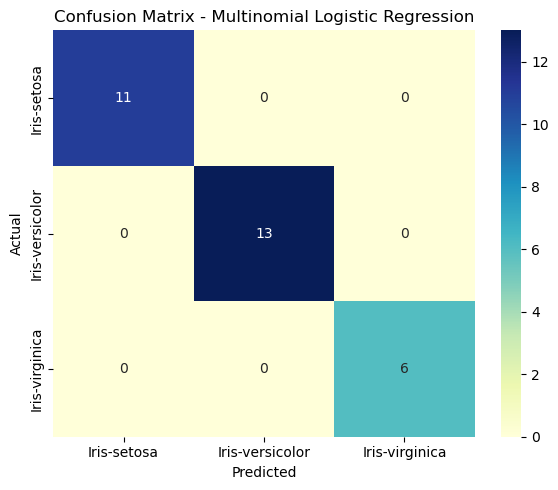

In [15]:
# Step 11: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [16]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


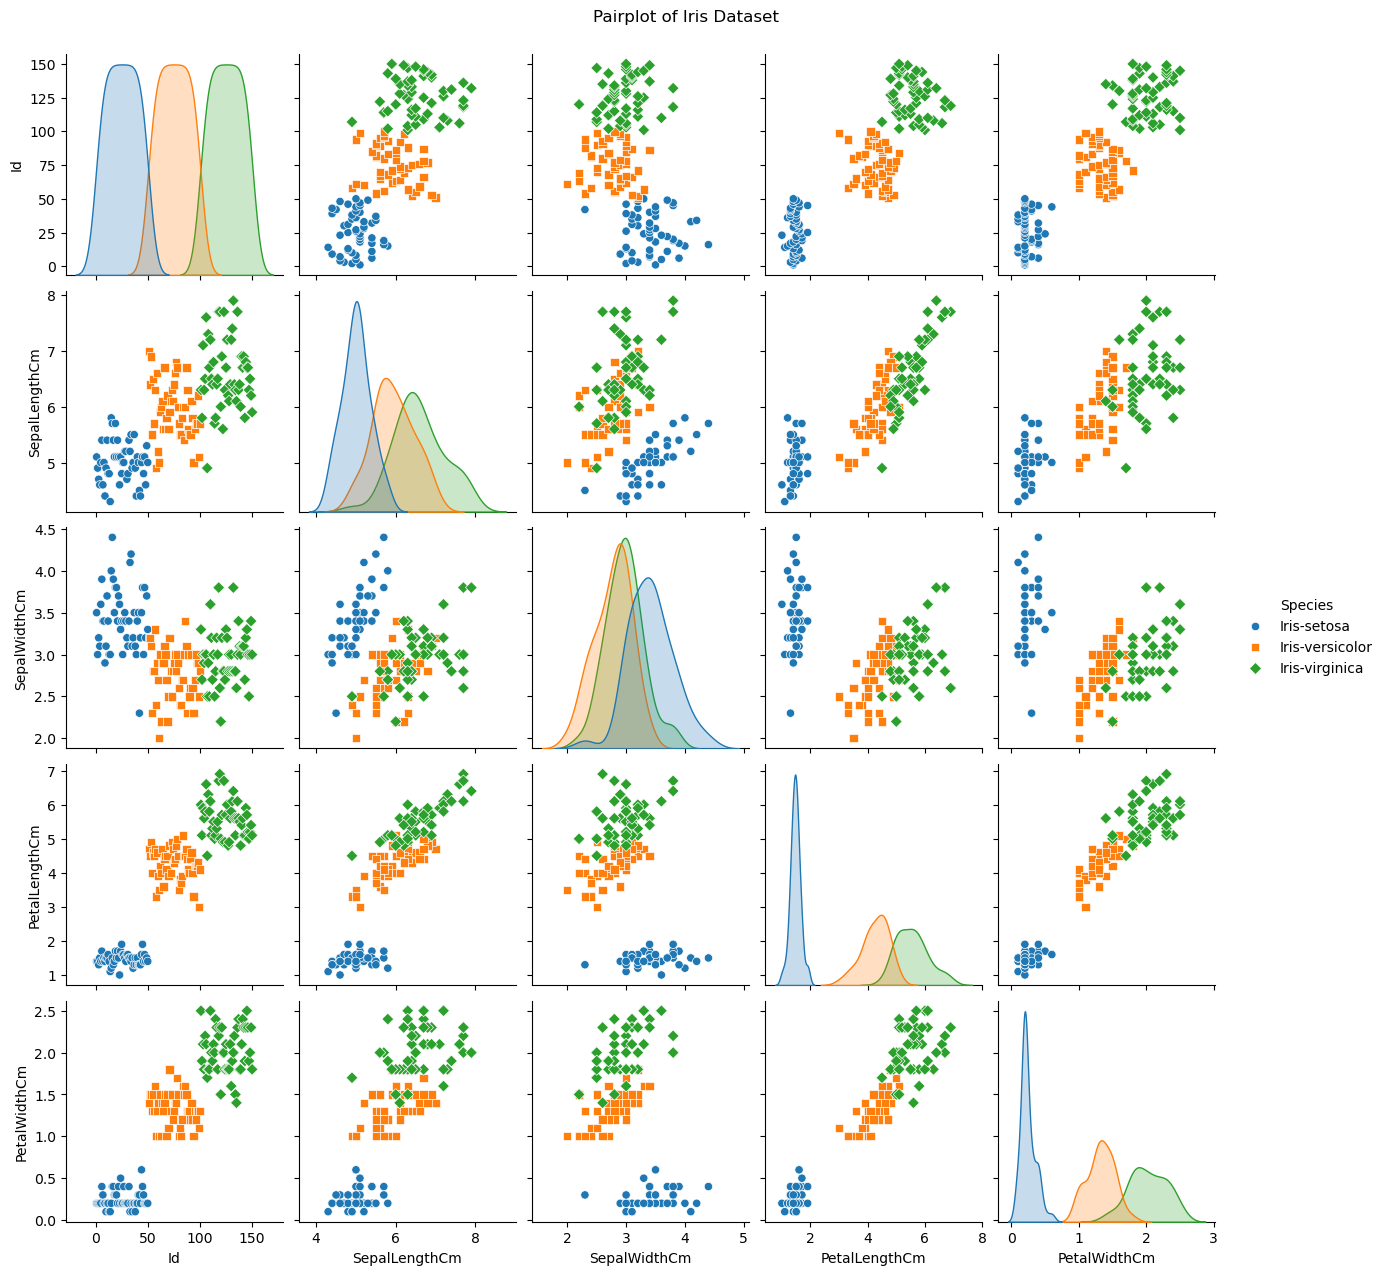

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is called 'dataset' and has the original features and 'Species' column

# Pairplot with hue set to species to show different classes in different colors
sns.pairplot(dataset, hue='Species', diag_kind='kde', markers=["o", "s", "D"])

plt.suptitle("Pairplot of Iris Dataset", y=1.02)  # title with some padding
plt.show()